In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [ ]:
def depthwise_convolution(image, kernel):
    """
    Apply depthwise convolution to an image with the given kernel.
    Assumes image has shape (H, W, D) and kernel has shape (kH, kW, D),
    where H is height, W is width, D is depth, and kH/kW are the kernel dimensions.
    """
    output_depth = image.shape[2]
    output_image = np.zeros_like(image)

    for d in range(output_depth):
        output_image[:, :, d] = convolve2d(image[:, :, d], kernel[:, :, d], mode='same', boundary='wrap')

    return output_image

def pointwise_convolution(image, kernel):
    """
    Apply pointwise convolution to an image with the given kernel.
    Assumes image has shape (H, W, D) and kernel has shape (D, D'),
    where H is height, W is width, D is the initial depth, and D' is the output depth.
    """
    # Ensuring the input image has a third dimension
    if image.ndim < 3:
        image = np.expand_dims(image, axis=-1)

    # Number of output channels
    output_depth = kernel.shape[1]

    # Initialize the output image with zeros
    height, width, _ = image.shape
    output_image = np.zeros((height, width, output_depth))

    for d_prime in range(output_depth):
        for d in range(kernel.shape[0]):
            output_image[:, :, d_prime] += convolve2d(image[:, :, d], np.ones((1, 1)) * kernel[d, d_prime], mode='same', boundary='wrap')

    return output_image

In [ ]:
# Generate an example image (for simplicity, a small grayscale image)
image = np.random.rand(10, 10)

# Creating a depthwise kernel (for simplicity, a single depth channel)
depthwise_kernel = np.random.rand(3, 3, 1)

# Creating a pointwise kernel (transforming from 1 channel to 3 channels)
pointwise_kernel = np.random.rand(1, 3)

# Convert the example image to have a depth of 1 for demonstration
example_image = np.expand_dims(image, axis=-1)

# Apply depthwise convolution
depthwise_convoluted_image = depthwise_convolution(example_image, depthwise_kernel)

# Apply pointwise convolution
pointwise_convoluted_image = pointwise_convolution(depthwise_convoluted_image, pointwise_kernel)


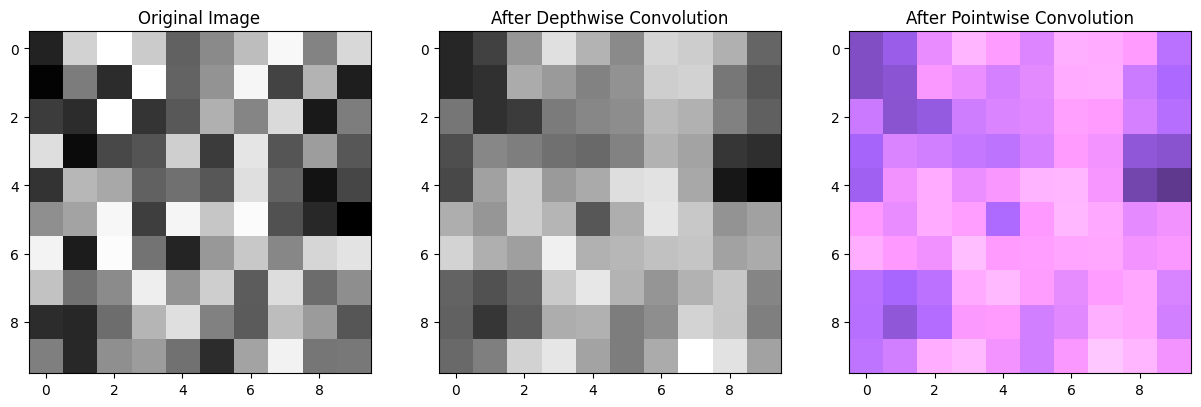

In [ ]:
# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(example_image.squeeze(), cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(depthwise_convoluted_image.squeeze(), cmap='gray')
ax[1].set_title("After Depthwise Convolution")
ax[2].imshow(pointwise_convoluted_image.squeeze(), cmap='gray')
ax[2].set_title("After Pointwise Convolution")
plt.show()